In [79]:
import os
import pathlib
import sys
import ipykernel
import numpy as np
import matplotlib.pyplot as plt

# 获取当前Notebook的路径
notebook_path = os.getcwd()
# 将父目录添加到sys.path中
sys.path.insert(0, os.path.join(notebook_path, "../bandit/"))
sys.path.insert(0, os.path.join(notebook_path, "../algos/"))

from k_arm_bandit import BanditMachine
from epsilon_greedy import EpsilonGreedy


In [80]:
# 初始化多臂老虎机
bandits = BanditMachine(10)
for i in range(10):
    print("arm: ", i, "miu: ", bandits.miu_list[i])

arm:  0 miu:  2.0399806616653775
arm:  1 miu:  0.024354789548664085
arm:  2 miu:  -0.05952614004120446
arm:  3 miu:  1.3444066537796564
arm:  4 miu:  -1.2003455403077525
arm:  5 miu:  0.7083404504748807
arm:  6 miu:  0.24804064783206847
arm:  7 miu:  0.5806107491434157
arm:  8 miu:  0.2914322882476669
arm:  9 miu:  -0.1751085827618803


In [81]:
bandits.miu_list = [-1, -1, -1, -1, -1, -1, -1, -1, -1, 1]
# bandits.miu_list = [-1, 1]

for i in range(10):
    print("arm: ", i, "miu: ", bandits.miu_list[i])

arm:  0 miu:  -1
arm:  1 miu:  -1
arm:  2 miu:  -1
arm:  3 miu:  -1
arm:  4 miu:  -1
arm:  5 miu:  -1
arm:  6 miu:  -1
arm:  7 miu:  -1
arm:  8 miu:  -1
arm:  9 miu:  1


In [26]:
# 初始化 Episilon-greedy 算法
e = 0.1
e_greedy_bandits = EpsilonGreedy(bandits, e)

In [ ]:
# 运行 Epsilon-Greedy 算法
for _ in range(25):
    chosen_arm, reward = e_greedy_bandits.play()
    print("chosen_arm: ", chosen_arm, "reward: ", reward)
    

Probabilities of selecting each arm at step 11:
Arm 0: 0.03175
Arm 1: 0.0375
Arm 2: 0.03275
Arm 3: 0.03975
Arm 4: 0.033
Arm 5: 0.031
Arm 6: 0.03225
Arm 7: 0.0465
Arm 8: 0.03225
Arm 9: 0.68325


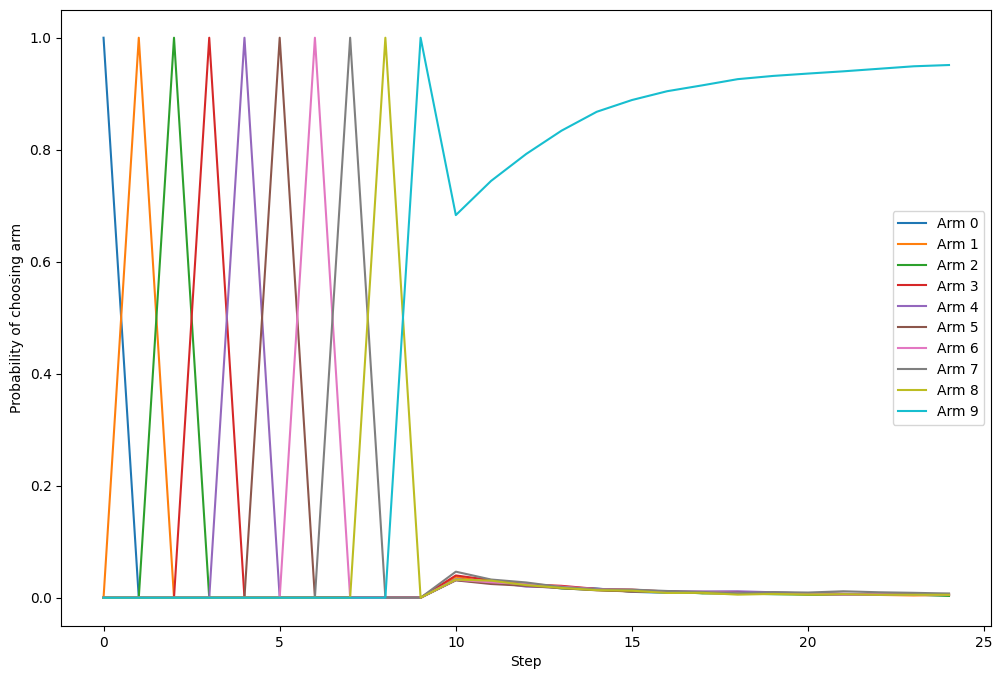

In [82]:
import numpy as np
import matplotlib.pyplot as plt

# 初始化 Epsilon-greedy 算法
e = 0.0
# e_greedy_bandits = EpsilonGreedy(bandits, e)

# 初始化 轮数
total_rounds = 4000

# 初始化 每轮运行的步数
total_steps = 25

# 用于记录每一步每个臂被选择的次数
arm_counts = np.zeros((total_steps, bandits.n_arms))

# 运行 Epsilon-Greedy 算法 100 遍
for _ in range(total_rounds):
    e_greedy_bandits = EpsilonGreedy(bandits, e)  # 为每轮运行重新初始化
    for step in range(total_steps):
        chosen_arm, _ = e_greedy_bandits.play()
        arm_counts[step, chosen_arm] += 1

# 将次数转换为概率
arm_probabilities = arm_counts / total_rounds

# 输出第11步的每个臂的概率值
step = 10  # 第11步对应的索引是10（从0开始计数）
print(f"Probabilities of selecting each arm at step {step + 1}:")
for arm in range(bandits.n_arms):
    print(f"Arm {arm}: {arm_probabilities[step, arm]}")

# 绘制每一步选择每个臂的概率
plt.figure(figsize=(12, 8))
for arm in range(bandits.n_arms):
    plt.plot(arm_probabilities[:, arm], label=f'Arm {arm}')
plt.xlabel('Step')
plt.ylabel('Probability of choosing arm')
plt.legend()
plt.show()
